## Sentiment analysis of imdb data - project

The project is based on IMDB movie review data available at https://ai.stanford.edu/~amaas/data/sentiment/   
The dataset contains reviews of a total of 50000 movies, of which 25000 each are used for training and 
testing  
The keras.datasets.imdb module is used to load this data in a form suitable for training a neural network


### Importing the data

The imdb module in keras.datasets and method load_data is used to 
load the data in a usable form for training.  
The review files are uniquely indexed.  
The words that occur in the reviews are also indexed based on the overall frequency of their appearence in the dataset

In [1]:
from tensorflow.keras.datasets import imdb

2022-09-20 07:46:42.099401: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-20 07:46:42.154714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-20 07:46:42.154743: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# help(imdb.load_data)
# imdb.load_data(num_words=None, maxlen=None)

# num_words limits the no.of entries in the word count vector
# eg. if num_words = 20000, only the 20000 highest frequency words are kept

# max_len limits the sequence length of each review

### Using only the 20,000 most frequent words in the overall dataset

In [3]:
(x_train, y_train), (x_test0, y_test0) = imdb.load_data(num_words=20000)

In [4]:
# y_train and y_test contains 25000 labels  each which are either 0 or 1
print(f'y_train.size = {y_train.size} and y_test.size = {y_test0.size}')
print(f'y_train = {y_train}, y_test = {y_test0}')

y_train.size = 25000 and y_test.size = 25000
y_train = [1 0 0 ... 0 1 0], y_test = [0 1 1 ... 0 0 0]


### Limiting each review to only the first 80 words to keep it manageable

In [5]:
# Vectorized text or count vectorizer

# x_train and x_test are arrays of size 25000 each but each element is the review text with the words 
# replaced with their index, i.e. their overall frequency in the dataset.

In [6]:
from tensorflow.keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=80)
x_test0 = sequence.pad_sequences(x_test0, maxlen=80)

In [7]:
print(f'x_train = {x_train}')
print(f'\nlen(x_train) = {len(x_train)} and len(x_test0) = {len(x_test0)}')

x_train = [[   15   256     4 ...    19   178    32]
 [  125    68     2 ...    16   145    95]
 [  645   662     8 ...     7   129   113]
 ...
 [  529   443 17793 ...     4  3586     2]
 [  286  1814    23 ...    12     9    23]
 [   97    90    35 ...   204   131     9]]

len(x_train) = 25000 and len(x_test0) = 25000


### Splitting test data into validation and test sets

In [8]:
from sklearn.model_selection import train_test_split

x_valid, x_test, y_valid, y_test = train_test_split(x_test0,y_test0, test_size=0.2)

In [9]:
print(f'\nlen(x_test) = {len(x_test)} and len(x_valid) = {len(x_valid)}')
print(f'\nlen(y_test) = {len(y_test)} and len(y_valid) = {len(y_valid)}')


len(x_test) = 5000 and len(x_valid) = 20000

len(y_test) = 5000 and len(y_valid) = 20000


### Neural network modules

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM

# sequential - each layer of units get connected to the next layer
# dense - each unit in a layer connected to all other units in next layer
# embedding - one hot coding is not practical with words, so word embedding converts the words to fixed 
#             length vectors but with real values instead of just 0 and 1 as in 1 hot coding
# lstm - long short term memory to avoid only recent words from having significant effect on the unit/neuron
#        uses tanh for activation and sigmoid for recurrent activation by default

In [11]:
# help(Embedding)

### RNN - Embedding layer + LSTM + Activation function

sigmoid activation is being used for output layer

#### model1

In [51]:
model1 = Sequential()
model1.add(Embedding(20000, 128))
model1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(1, activation='sigmoid'))

#### model2

In [52]:
model2 = Sequential()
model2.add(Embedding(20000, 256))
model2.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))

#### model3

In [53]:
model3 = Sequential()
model3.add(Embedding(20000, 128))
model3.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model3.add(Dense(1, activation='sigmoid'))

In [38]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [39]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         5120000   
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 5,645,569
Trainable params: 5,645,569
Non-trainable params: 0
_________________________________________________________________


In [40]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [15]:
# help(model)

In [16]:
import tensorflow as tf
# help(tf.keras.optimizers.Optimizer)
# help(tf.keras.losses)
# help(tf.keras.metrics)
# help(model.fit)

### Optimizing using binary cross entropy as loss function with adam optimizer

In [54]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training

In [20]:
# help(model.fit)
# help(m)

In [21]:
m1 = model1.fit(x_train, y_train, batch_size=32, epochs=15, verbose=2, validation_data=(x_valid, y_valid))

Epoch 1/15
782/782 - 74s - loss: 0.4330 - accuracy: 0.7991 - val_loss: 0.3700 - val_accuracy: 0.8328 - 74s/epoch - 94ms/step
Epoch 2/15
782/782 - 75s - loss: 0.2558 - accuracy: 0.8982 - val_loss: 0.3676 - val_accuracy: 0.8388 - 75s/epoch - 96ms/step
Epoch 3/15
782/782 - 75s - loss: 0.1658 - accuracy: 0.9366 - val_loss: 0.4610 - val_accuracy: 0.8289 - 75s/epoch - 96ms/step
Epoch 4/15
782/782 - 75s - loss: 0.1085 - accuracy: 0.9594 - val_loss: 0.5568 - val_accuracy: 0.8206 - 75s/epoch - 96ms/step
Epoch 5/15
782/782 - 76s - loss: 0.0770 - accuracy: 0.9730 - val_loss: 0.6518 - val_accuracy: 0.8217 - 76s/epoch - 97ms/step
Epoch 6/15
782/782 - 83s - loss: 0.0546 - accuracy: 0.9813 - val_loss: 0.7697 - val_accuracy: 0.8193 - 83s/epoch - 106ms/step
Epoch 7/15
782/782 - 75s - loss: 0.0506 - accuracy: 0.9832 - val_loss: 0.7776 - val_accuracy: 0.8109 - 75s/epoch - 96ms/step
Epoch 8/15
782/782 - 75s - loss: 0.0279 - accuracy: 0.9902 - val_loss: 0.8838 - val_accuracy: 0.8169 - 75s/epoch - 96ms/step

In [22]:
m2 = model2.fit(x_train, y_train, batch_size=32, epochs=15, verbose=2, validation_data=(x_valid, y_valid))

Epoch 1/15
782/782 - 215s - loss: 0.4356 - accuracy: 0.7960 - val_loss: 0.3637 - val_accuracy: 0.8433 - 215s/epoch - 275ms/step
Epoch 2/15
782/782 - 212s - loss: 0.2539 - accuracy: 0.8984 - val_loss: 0.3893 - val_accuracy: 0.8273 - 212s/epoch - 271ms/step
Epoch 3/15
782/782 - 215s - loss: 0.1561 - accuracy: 0.9404 - val_loss: 0.4350 - val_accuracy: 0.8189 - 215s/epoch - 275ms/step
Epoch 4/15
782/782 - 213s - loss: 0.0975 - accuracy: 0.9656 - val_loss: 0.5465 - val_accuracy: 0.8286 - 213s/epoch - 273ms/step
Epoch 5/15
782/782 - 213s - loss: 0.0694 - accuracy: 0.9757 - val_loss: 0.6211 - val_accuracy: 0.8176 - 213s/epoch - 273ms/step
Epoch 6/15
782/782 - 213s - loss: 0.0479 - accuracy: 0.9841 - val_loss: 0.6455 - val_accuracy: 0.8234 - 213s/epoch - 272ms/step
Epoch 7/15
782/782 - 212s - loss: 0.0275 - accuracy: 0.9920 - val_loss: 0.8299 - val_accuracy: 0.8231 - 212s/epoch - 271ms/step
Epoch 8/15
782/782 - 212s - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.8545 - val_accuracy: 0.8241 - 

In [23]:
m3 = model3.fit(x_train, y_train, batch_size=32, epochs=15, verbose=2, validation_data=(x_valid, y_valid))

Epoch 1/15
782/782 - 78s - loss: 0.4328 - accuracy: 0.7937 - val_loss: 0.3548 - val_accuracy: 0.8448 - 78s/epoch - 99ms/step
Epoch 2/15
782/782 - 77s - loss: 0.2609 - accuracy: 0.8975 - val_loss: 0.3881 - val_accuracy: 0.8366 - 77s/epoch - 99ms/step
Epoch 3/15
782/782 - 75s - loss: 0.1746 - accuracy: 0.9326 - val_loss: 0.4354 - val_accuracy: 0.8282 - 75s/epoch - 96ms/step
Epoch 4/15
782/782 - 75s - loss: 0.1169 - accuracy: 0.9578 - val_loss: 0.5572 - val_accuracy: 0.8238 - 75s/epoch - 96ms/step
Epoch 5/15
782/782 - 75s - loss: 0.0833 - accuracy: 0.9704 - val_loss: 0.5828 - val_accuracy: 0.8206 - 75s/epoch - 96ms/step
Epoch 6/15
782/782 - 76s - loss: 0.0587 - accuracy: 0.9788 - val_loss: 0.7578 - val_accuracy: 0.7725 - 76s/epoch - 97ms/step
Epoch 7/15
782/782 - 75s - loss: 0.0508 - accuracy: 0.9820 - val_loss: 0.7863 - val_accuracy: 0.8170 - 75s/epoch - 96ms/step
Epoch 8/15
782/782 - 75s - loss: 0.0314 - accuracy: 0.9897 - val_loss: 0.7479 - val_accuracy: 0.8142 - 75s/epoch - 96ms/step


In [24]:
# m1.history

In [25]:
# m2.history

In [26]:
# m3.history

### Accuracy

#### model1

In [41]:
score, acc = model1.evaluate(x_test, y_test, batch_size=32, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

test_plot = {}
test_plot['Model1']=acc

157/157 - 2s - loss: 1.0867 - accuracy: 0.8114 - 2s/epoch - 11ms/step
Test score: 1.0866703987121582
Test accuracy: 0.8113999962806702


#### model2

In [42]:
score, acc = model2.evaluate(x_test, y_test, batch_size=32, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

test_plot['Model2']=acc

157/157 - 5s - loss: 1.0903 - accuracy: 0.8074 - 5s/epoch - 33ms/step
Test score: 1.0903085470199585
Test accuracy: 0.8073999881744385


#### model3

In [43]:
score, acc = model3.evaluate(x_test, y_test, batch_size=32, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

test_plot['Model3']=acc

157/157 - 2s - loss: 1.1348 - accuracy: 0.8070 - 2s/epoch - 11ms/step
Test score: 1.134796142578125
Test accuracy: 0.8069999814033508


### Plotting the accuracy

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

#### Accuracy on Training and Validation data

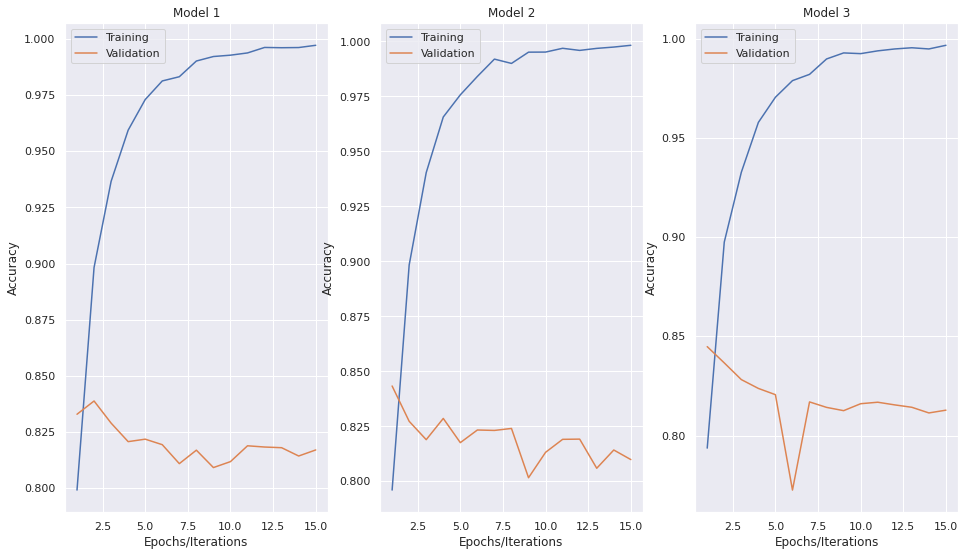

In [37]:
epoch = np.arange(1,16,1)

train_acc_1 = m1.history['accuracy']
valid_acc_1 = m1.history['val_accuracy']

train_acc_2 = m2.history['accuracy']
valid_acc_2 = m2.history['val_accuracy']

train_acc_3 = m3.history['accuracy']
valid_acc_3 = m3.history['val_accuracy']

plt.figure(figsize=(16,9))
# plt.title('Accuracy of model with training')
plt.ylabel('Accuracy')
plt.xlabel('Epochs/Iterations')

plt.subplot(1,3,1)
plt.plot(epoch,train_acc_1,label='Training')
plt.plot(epoch,valid_acc_1,label='Validation')
plt.title('Model 1')
plt.ylabel('Accuracy')
plt.xlabel('Epochs/Iterations')
plt.legend()

plt.subplot(1,3,2)
plt.plot(epoch,train_acc_2,label='Training')
plt.plot(epoch,valid_acc_2,label='Validation')
plt.title('Model 2')
plt.ylabel('Accuracy')
plt.xlabel('Epochs/Iterations')
plt.legend()

plt.subplot(1,3,3)
plt.plot(epoch,train_acc_3,label='Training')
plt.plot(epoch,valid_acc_3,label='Validation')
plt.title('Model 3')
plt.ylabel('Accuracy')
plt.xlabel('Epochs/Iterations')
plt.legend()

plt.show()

#### Accuracy on test data after training for 15 epochs

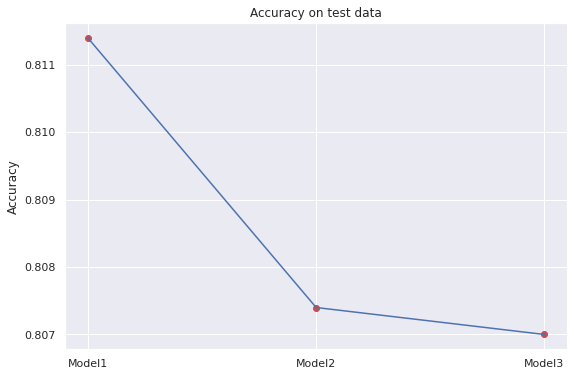

In [49]:
x = test_plot.keys()
y = test_plot.values()

plt.figure(figsize=(9,6))

plt.plot(x,y)
plt.scatter(x,y,c='r')

plt.title('Accuracy on test data')
plt.ylabel('Accuracy')
plt.show()

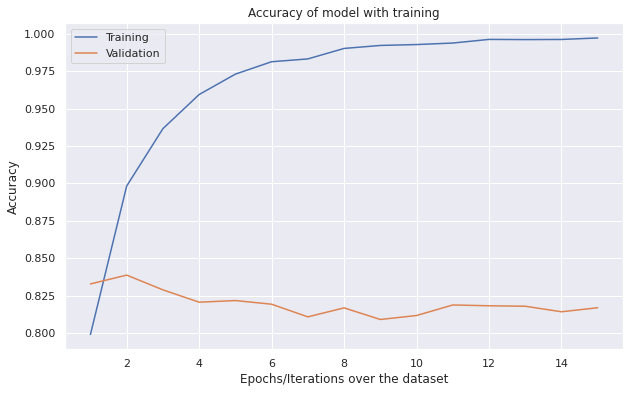

In [32]:
plt.figure(figsize=(10,6))
plt.title('Accuracy of model with training')
plt.ylabel('Accuracy')
plt.xlabel('Epochs/Iterations over the dataset')

# plt.subplot(1,3,1)
plt.plot(epoch,train_acc_1,label='Training')
plt.plot(epoch,valid_acc_1,label='Validation')


# plt.subplot(1,3,2)
# plt.plot(epoch,train_acc_2)
# plt.plot(epoch,valid_acc_2)

# plt.subplot(1,3,3)
# plt.plot(epoch,train_acc_3)
# plt.plot(epoch,valid_acc_3)

plt.legend()
plt.show()

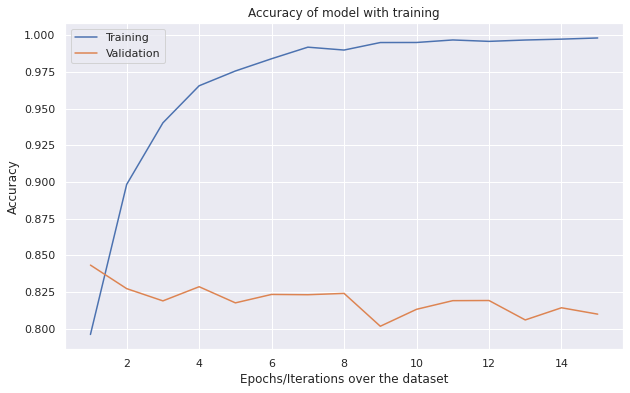

In [33]:
plt.figure(figsize=(10,6))
plt.title('Accuracy of model with training')
plt.ylabel('Accuracy')
plt.xlabel('Epochs/Iterations over the dataset')

# plt.subplot(1,3,1)
# plt.plot(epoch,train_acc_1,label='Training')
# plt.plot(epoch,valid_acc_1,label='Validation')


# plt.subplot(1,3,2)
plt.plot(epoch,train_acc_2,label='Training')
plt.plot(epoch,valid_acc_2,label='Validation')

# plt.subplot(1,3,3)
# plt.plot(epoch,train_acc_3,label='Training')
# plt.plot(epoch,valid_acc_3,label='Validation')

plt.legend()
plt.show()

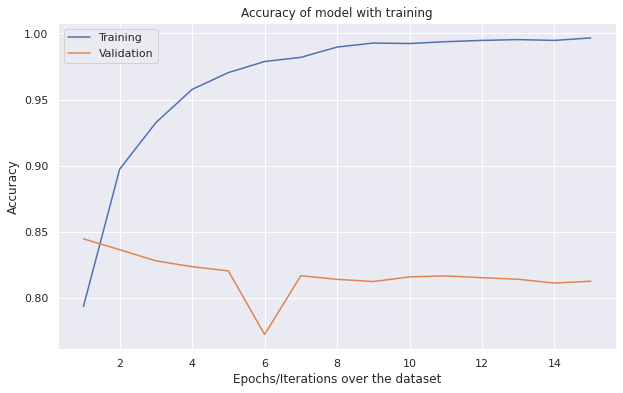

In [34]:
plt.figure(figsize=(10,6))
plt.title('Accuracy of model with training')
plt.ylabel('Accuracy')
plt.xlabel('Epochs/Iterations over the dataset')

# plt.subplot(1,3,1)
# plt.plot(epoch,train_acc_1,label='Training')
# plt.plot(epoch,valid_acc_1,label='Validation')


# plt.subplot(1,3,2)
# plt.plot(epoch,train_acc_2,label='Training')
# plt.plot(epoch,valid_acc_2,label='Validation')

# plt.subplot(1,3,3)
plt.plot(epoch,train_acc_3,label='Training')
plt.plot(epoch,valid_acc_3,label='Validation')

plt.legend()
plt.show()

### Training each model for only 1 epoch

In [60]:
m1 = model1.fit(x_train, y_train, batch_size=32, epochs=1, verbose=2, validation_data=(x_valid, y_valid))

782/782 - 75s - loss: 0.2558 - accuracy: 0.8972 - val_loss: 0.4073 - val_accuracy: 0.8259 - 75s/epoch - 96ms/step


In [61]:
m2 = model2.fit(x_train, y_train, batch_size=32, epochs=1, verbose=2, validation_data=(x_valid, y_valid))

782/782 - 236s - loss: 0.2486 - accuracy: 0.8997 - val_loss: 0.3936 - val_accuracy: 0.8245 - 236s/epoch - 301ms/step


In [62]:
m3 = model3.fit(x_train, y_train, batch_size=32, epochs=1, verbose=2, validation_data=(x_valid, y_valid))

782/782 - 78s - loss: 0.1248 - accuracy: 0.9536 - val_loss: 0.5491 - val_accuracy: 0.8255 - 78s/epoch - 100ms/step


In [63]:
score, acc = model1.evaluate(x_test, y_test, batch_size=32, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

test_plot2 = {}
test_plot2['Model1']=acc

157/157 - 2s - loss: 0.4125 - accuracy: 0.8188 - 2s/epoch - 11ms/step
Test score: 0.4125228524208069
Test accuracy: 0.8187999725341797


In [64]:
score, acc = model2.evaluate(x_test, y_test, batch_size=32, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

test_plot2['Model2']=acc

157/157 - 5s - loss: 0.3932 - accuracy: 0.8238 - 5s/epoch - 31ms/step
Test score: 0.39322397112846375
Test accuracy: 0.8238000273704529


In [65]:
score, acc = model3.evaluate(x_test, y_test, batch_size=32, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

test_plot2['Model3']=acc

157/157 - 2s - loss: 0.5621 - accuracy: 0.8178 - 2s/epoch - 12ms/step
Test score: 0.5621422529220581
Test accuracy: 0.817799985408783


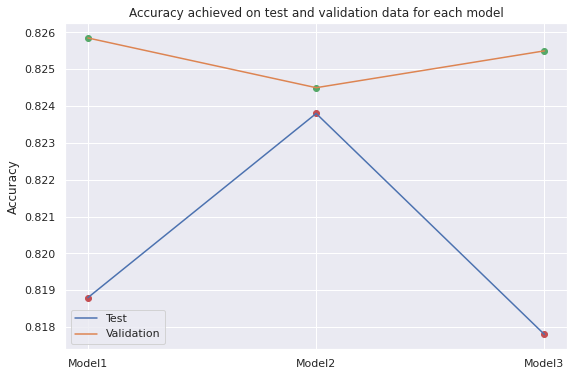

In [69]:
x = test_plot2.keys()
y = test_plot2.values()

y2 = [m1.history['val_accuracy'],m2.history['val_accuracy'],m3.history['val_accuracy']]

plt.figure(figsize=(9,6))

plt.plot(x,y,label='Test')
plt.scatter(x,y,c='r')
plt.legend()

plt.plot(x,y2,label='Validation')
plt.scatter(x,y2,c='g')
plt.legend()

plt.title('Accuracy achieved on test and validation data for each model')
plt.ylabel('Accuracy')
plt.show()